In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold
import tensorflow as tf
#rsp_deap_data, rsp_deap_label = joblib.load(open('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/data/lstm_slider128_rsp_raw_nooverlap_nobaseline.dat', 'rb'))
rsp_deap_data, rsp_deap_label = joblib.load(open('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/data/lstm_slider128_rsp_raw_overlap32_withbaseline.dat', 'rb'))
#convert raw label into categorical data- this generates 10 classes
from tensorflow.keras.utils import to_categorical

def data_binarizer(ratings, threshold1, threshold2):
	"""binarizes the data below and above the threshold"""
	binarized = []
	for rating in ratings:
		if rating < threshold1:
			binarized.append(0)
		elif rating>= threshold2:
			binarized.append(1)
	return binarized

#convert binarized label (0 and 1) into categorical data- this generates 2 classes
y_valence = np.array(data_binarizer([el[0] for el in rsp_deap_label],5,5))
Z1 = np.ravel(y_valence)
y_train1 = to_categorical(Z1)
y_train1


from collections import Counter
 # summarize observations by class labeL
counter = Counter(y_valence)
print(counter)

#use stratify for split   
X_train_rsp_val, X_test_rsp_val, y_train_rsp_val, y_test_rsp_val = train_test_split(rsp_deap_data, y_train1, test_size=0.2, random_state=42, stratify=y_train1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(X_train_rsp_val)
testing_set_scaled = sc.transform(X_test_rsp_val)

#sc.data_min_
#sc.data_max_
n_features = 1
x_train = training_set_scaled.reshape(training_set_scaled.shape[0], training_set_scaled.shape[1],n_features )
x_test = testing_set_scaled.reshape(testing_set_scaled.shape[0], testing_set_scaled.shape[1], n_features)
print(x_train.shape)
print(x_test.shape)

Counter({1: 178828, 0: 137332})
(252928, 128, 1)
(63232, 128, 1)


In [18]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Permute
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking,  BatchNormalization
#from keras.utils import plot_model

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Activation
from sklearn.model_selection import train_test_split


from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import optimizers 

In [4]:
    
input_shape = (x_train.shape[1],x_train.shape[2])

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(64, input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
model.fit(x_train, y_train_rsp_val,epochs=100,batch_size=256,verbose=1,validation_data=(x_test, y_test_rsp_val))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 128)          66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 116,098
Trainable params: 116,098
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
988/988 [==============================] - 28s 26ms/step - loss: 0.6843 - accuracy: 0.5665 - val_

KeyboardInterrupt: 

In [6]:
input_shape = (x_train.shape[1],x_train.shape[2])

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(256))  
model.add(Dropout(0.3))     
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
with tf.device('/GPU:0'):
    model.fit(x_train, y_train_rsp_val,epochs=100,batch_size=128,verbose=1,validation_data=(x_test, y_test_rsp_val))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 128, 256)          133120    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 256)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 658,946
Trainable params: 658,946
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1976/1976 [==============================] - 79s 38ms/step - loss: 0.6844 - accuracy: 0.5662 - va

In [7]:
x_train = training_set_scaled.reshape(training_set_scaled.shape[0], 1, training_set_scaled.shape[1])
x_test = testing_set_scaled.reshape(testing_set_scaled.shape[0],1, testing_set_scaled.shape[1])
input_shape = (1,x_train.shape[2])

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.2))
model.add(LSTM(256))  
model.add(Dropout(0.3))     
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())
with tf.device('/GPU:0'):
    model.fit(x_train, y_train_rsp_val,epochs=100,batch_size=128,verbose=1,validation_data=(x_test, y_test_rsp_val))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 1, 256)            263168    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 788,994
Trainable params: 788,994
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1976/1976 [==============================] - 15s 6ms/step - loss: 0.6834 - accuracy: 0.5661 - val

Epoch 50/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6601 - accuracy: 0.5930 - val_loss: 0.6953 - val_accuracy: 0.5710
Epoch 51/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6597 - accuracy: 0.5933 - val_loss: 0.6954 - val_accuracy: 0.5698
Epoch 52/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6590 - accuracy: 0.5941 - val_loss: 0.6967 - val_accuracy: 0.5705
Epoch 53/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6583 - accuracy: 0.5946 - val_loss: 0.6966 - val_accuracy: 0.5704
Epoch 54/100
1976/1976 [==============================] - 11s 5ms/step - loss: 0.6576 - accuracy: 0.5961 - val_loss: 0.6989 - val_accuracy: 0.5697
Epoch 55/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6573 - accuracy: 0.5964 - val_loss: 0.6968 - val_accuracy: 0.5701
Epoch 56/100
1976/1976 [==============================] - 10s 5ms/step - loss: 0.6568 - accuracy: 0.5966 - val_loss: 0

In [4]:
print(x_train.shape)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train_rsp_val, epochs=100, batch_size=64, verbose=2,validation_data=(x_test, y_test_rsp_val))
# evaluate model
#_, accuracy = model.evaluate(x_test, y_test_rsp_val, batch_size=64, verbose=2)

(252928, 128, 1)
Epoch 1/100
3952/3952 - 23s - loss: 0.6830 - accuracy: 0.5669 - val_loss: 0.6822 - val_accuracy: 0.5709
Epoch 2/100
3952/3952 - 11s - loss: 0.6813 - accuracy: 0.5693 - val_loss: 0.6813 - val_accuracy: 0.5708
Epoch 3/100
3952/3952 - 10s - loss: 0.6806 - accuracy: 0.5699 - val_loss: 0.6807 - val_accuracy: 0.5707
Epoch 4/100
3952/3952 - 11s - loss: 0.6800 - accuracy: 0.5705 - val_loss: 0.6801 - val_accuracy: 0.5733
Epoch 5/100
3952/3952 - 10s - loss: 0.6794 - accuracy: 0.5716 - val_loss: 0.6800 - val_accuracy: 0.5728
Epoch 6/100
3952/3952 - 10s - loss: 0.6785 - accuracy: 0.5716 - val_loss: 0.6802 - val_accuracy: 0.5715
Epoch 7/100
3952/3952 - 10s - loss: 0.6774 - accuracy: 0.5724 - val_loss: 0.6803 - val_accuracy: 0.5721
Epoch 8/100
3952/3952 - 10s - loss: 0.6759 - accuracy: 0.5741 - val_loss: 0.6797 - val_accuracy: 0.5712
Epoch 9/100
3952/3952 - 10s - loss: 0.6746 - accuracy: 0.5748 - val_loss: 0.6791 - val_accuracy: 0.5727
Epoch 10/100
3952/3952 - 10s - loss: 0.6733 - a

Epoch 79/100
3952/3952 - 10s - loss: 0.6082 - accuracy: 0.6434 - val_loss: 0.7310 - val_accuracy: 0.5733
Epoch 80/100
3952/3952 - 10s - loss: 0.6069 - accuracy: 0.6446 - val_loss: 0.7394 - val_accuracy: 0.5726
Epoch 81/100
3952/3952 - 10s - loss: 0.6062 - accuracy: 0.6455 - val_loss: 0.7402 - val_accuracy: 0.5719
Epoch 82/100
3952/3952 - 10s - loss: 0.6054 - accuracy: 0.6451 - val_loss: 0.7417 - val_accuracy: 0.5713
Epoch 83/100
3952/3952 - 10s - loss: 0.6062 - accuracy: 0.6456 - val_loss: 0.7414 - val_accuracy: 0.5704
Epoch 84/100
3952/3952 - 10s - loss: 0.6046 - accuracy: 0.6460 - val_loss: 0.7359 - val_accuracy: 0.5731
Epoch 85/100
3952/3952 - 10s - loss: 0.6047 - accuracy: 0.6468 - val_loss: 0.7454 - val_accuracy: 0.5711
Epoch 86/100
3952/3952 - 10s - loss: 0.6042 - accuracy: 0.6475 - val_loss: 0.7183 - val_accuracy: 0.5720
Epoch 87/100
3952/3952 - 10s - loss: 0.6032 - accuracy: 0.6474 - val_loss: 0.7443 - val_accuracy: 0.5726
Epoch 88/100
3952/3952 - 10s - loss: 0.6028 - accuracy:

In [11]:
#https://shivapriya-katta.medium.com/time-series-forecasting-using-conv1d-lstm-multiple-timesteps-into-future-acc684dcaaa

print(x_train.shape)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.4))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train_rsp_val, epochs=100, batch_size=128, verbose=2,validation_data=(x_test, y_test_rsp_val))

'''
model = Sequential([Conv1D(filters=32, kernel_size=3,
                               strides=1, padding="causal",
                               activation="relu",
                               input_shape=[None, 7]),
        Bidirectional(LSTM(32, return_sequences=True)),
        Bidirectional(LSTM(32,  return_sequences=False)),
        Dense(1),
        tensorflow.keras.layers.Lambda(lambda x: x * 200)])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
# lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tensorflow.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tensorflow.keras.losses.Huber(),
optimizer=optimizer,
metrics=["mse"])
'''

(252928, 128, 1)
Epoch 1/100
1976/1976 - 55s - loss: 0.6836 - accuracy: 0.5664 - val_loss: 0.6827 - val_accuracy: 0.5684
Epoch 2/100
1976/1976 - 50s - loss: 0.6825 - accuracy: 0.5680 - val_loss: 0.6826 - val_accuracy: 0.5704
Epoch 3/100
1976/1976 - 49s - loss: 0.6822 - accuracy: 0.5683 - val_loss: 0.6818 - val_accuracy: 0.5697
Epoch 4/100
1976/1976 - 49s - loss: 0.6824 - accuracy: 0.5670 - val_loss: 0.6819 - val_accuracy: 0.5677
Epoch 5/100
1976/1976 - 49s - loss: 0.6822 - accuracy: 0.5678 - val_loss: 0.6819 - val_accuracy: 0.5705
Epoch 6/100
1976/1976 - 49s - loss: 0.6827 - accuracy: 0.5671 - val_loss: 0.6819 - val_accuracy: 0.5687
Epoch 7/100
1976/1976 - 49s - loss: 0.6826 - accuracy: 0.5677 - val_loss: 0.6821 - val_accuracy: 0.5684
Epoch 8/100
1976/1976 - 50s - loss: 0.6825 - accuracy: 0.5680 - val_loss: 0.6819 - val_accuracy: 0.5688
Epoch 9/100
1976/1976 - 50s - loss: 0.6821 - accuracy: 0.5692 - val_loss: 0.6814 - val_accuracy: 0.5708
Epoch 10/100
1976/1976 - 50s - loss: 0.6822 - a

Epoch 79/100
1976/1976 - 49s - loss: 0.6714 - accuracy: 0.5739 - val_loss: 0.6727 - val_accuracy: 0.5740
Epoch 80/100
1976/1976 - 49s - loss: 0.6715 - accuracy: 0.5757 - val_loss: 0.6719 - val_accuracy: 0.5749
Epoch 81/100
1976/1976 - 49s - loss: 0.6707 - accuracy: 0.5764 - val_loss: 0.6718 - val_accuracy: 0.5739
Epoch 82/100
1976/1976 - 49s - loss: 0.6729 - accuracy: 0.5748 - val_loss: 0.6736 - val_accuracy: 0.5737
Epoch 83/100
1976/1976 - 49s - loss: 0.6717 - accuracy: 0.5760 - val_loss: 0.6728 - val_accuracy: 0.5696
Epoch 84/100
1976/1976 - 49s - loss: 0.6702 - accuracy: 0.5776 - val_loss: 0.6712 - val_accuracy: 0.5757
Epoch 85/100
1976/1976 - 50s - loss: 0.6697 - accuracy: 0.5793 - val_loss: 0.6709 - val_accuracy: 0.5752
Epoch 86/100
1976/1976 - 49s - loss: 0.6689 - accuracy: 0.5803 - val_loss: 0.6707 - val_accuracy: 0.5761
Epoch 87/100
1976/1976 - 49s - loss: 0.6684 - accuracy: 0.5813 - val_loss: 0.6700 - val_accuracy: 0.5791
Epoch 88/100
1976/1976 - 49s - loss: 0.6682 - accuracy:

'\nmodel = Sequential([Conv1D(filters=32, kernel_size=3,\n                               strides=1, padding="causal",\n                               activation="relu",\n                               input_shape=[None, 7]),\n        Bidirectional(LSTM(32, return_sequences=True)),\n        Bidirectional(LSTM(32,  return_sequences=False)),\n        Dense(1),\n        tensorflow.keras.layers.Lambda(lambda x: x * 200)])\n# lr_schedule = tf.keras.callbacks.LearningRateScheduler(\n# lambda epoch: 1e-8 * 10**(epoch / 20))\noptimizer = tensorflow.keras.optimizers.SGD(lr=1e-5, momentum=0.9)\nmodel.compile(loss=tensorflow.keras.losses.Huber(),\noptimizer=optimizer,\nmetrics=["mse"])\n'

In [12]:
#increase batch_size to 256
print(x_train.shape)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train_rsp_val, epochs=200, batch_size=256, verbose=2,validation_data=(x_test, y_test_rsp_val))


(252928, 128, 1)
Epoch 1/200
988/988 - 41s - loss: 0.6834 - accuracy: 0.5667 - val_loss: 0.6833 - val_accuracy: 0.5677
Epoch 2/200
988/988 - 36s - loss: 0.6824 - accuracy: 0.5677 - val_loss: 0.6812 - val_accuracy: 0.5689
Epoch 3/200
988/988 - 36s - loss: 0.6815 - accuracy: 0.5683 - val_loss: 0.6805 - val_accuracy: 0.5708
Epoch 4/200
988/988 - 36s - loss: 0.6807 - accuracy: 0.5683 - val_loss: 0.6791 - val_accuracy: 0.5704
Epoch 5/200
988/988 - 36s - loss: 0.6803 - accuracy: 0.5684 - val_loss: 0.6800 - val_accuracy: 0.5681
Epoch 6/200
988/988 - 36s - loss: 0.6799 - accuracy: 0.5685 - val_loss: 0.6800 - val_accuracy: 0.5692
Epoch 7/200
988/988 - 36s - loss: 0.6793 - accuracy: 0.5698 - val_loss: 0.6784 - val_accuracy: 0.5710
Epoch 8/200
988/988 - 36s - loss: 0.6787 - accuracy: 0.5698 - val_loss: 0.6776 - val_accuracy: 0.5713
Epoch 9/200
988/988 - 36s - loss: 0.6785 - accuracy: 0.5701 - val_loss: 0.6783 - val_accuracy: 0.5694
Epoch 10/200
988/988 - 36s - loss: 0.6783 - accuracy: 0.5704 - va

Epoch 81/200
988/988 - 36s - loss: 0.6626 - accuracy: 0.5892 - val_loss: 0.6677 - val_accuracy: 0.5837
Epoch 82/200
988/988 - 36s - loss: 0.6619 - accuracy: 0.5914 - val_loss: 0.6680 - val_accuracy: 0.5854
Epoch 83/200
988/988 - 36s - loss: 0.6621 - accuracy: 0.5908 - val_loss: 0.6675 - val_accuracy: 0.5846
Epoch 84/200
988/988 - 36s - loss: 0.6608 - accuracy: 0.5930 - val_loss: 0.6673 - val_accuracy: 0.5855
Epoch 85/200
988/988 - 36s - loss: 0.6603 - accuracy: 0.5931 - val_loss: 0.6658 - val_accuracy: 0.5866
Epoch 86/200
988/988 - 36s - loss: 0.6593 - accuracy: 0.5938 - val_loss: 0.6652 - val_accuracy: 0.5869
Epoch 87/200
988/988 - 36s - loss: 0.6588 - accuracy: 0.5952 - val_loss: 0.6658 - val_accuracy: 0.5859
Epoch 88/200
988/988 - 36s - loss: 0.6579 - accuracy: 0.5964 - val_loss: 0.6650 - val_accuracy: 0.5878
Epoch 89/200
988/988 - 36s - loss: 0.6570 - accuracy: 0.5982 - val_loss: 0.6653 - val_accuracy: 0.5893
Epoch 90/200
988/988 - 36s - loss: 0.6565 - accuracy: 0.5990 - val_loss: 

Epoch 160/200
988/988 - 36s - loss: 0.5936 - accuracy: 0.6571 - val_loss: 0.6631 - val_accuracy: 0.6161
Epoch 161/200
988/988 - 36s - loss: 0.5936 - accuracy: 0.6567 - val_loss: 0.6626 - val_accuracy: 0.6168
Epoch 162/200
988/988 - 36s - loss: 0.5917 - accuracy: 0.6576 - val_loss: 0.6627 - val_accuracy: 0.6166
Epoch 163/200
988/988 - 37s - loss: 0.5921 - accuracy: 0.6583 - val_loss: 0.6630 - val_accuracy: 0.6146
Epoch 164/200
988/988 - 36s - loss: 0.5908 - accuracy: 0.6591 - val_loss: 0.6625 - val_accuracy: 0.6163
Epoch 165/200
988/988 - 36s - loss: 0.5893 - accuracy: 0.6609 - val_loss: 0.6666 - val_accuracy: 0.6167
Epoch 166/200
988/988 - 36s - loss: 0.5902 - accuracy: 0.6601 - val_loss: 0.6571 - val_accuracy: 0.6191
Epoch 167/200
988/988 - 36s - loss: 0.5891 - accuracy: 0.6604 - val_loss: 0.6685 - val_accuracy: 0.6163
Epoch 168/200
988/988 - 36s - loss: 0.5881 - accuracy: 0.6616 - val_loss: 0.6604 - val_accuracy: 0.6168
Epoch 169/200
988/988 - 36s - loss: 0.5854 - accuracy: 0.6628 - 

In [13]:
#increase epochs to 500

print(x_train.shape)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_rsp_val, epochs=500, batch_size=256, verbose=2,validation_data=(x_test, y_test_rsp_val))


(252928, 128, 1)
Epoch 1/500
988/988 - 41s - loss: 0.6834 - accuracy: 0.5667 - val_loss: 0.6826 - val_accuracy: 0.5702
Epoch 2/500
988/988 - 36s - loss: 0.6825 - accuracy: 0.5682 - val_loss: 0.6822 - val_accuracy: 0.5680
Epoch 3/500
988/988 - 36s - loss: 0.6822 - accuracy: 0.5679 - val_loss: 0.6815 - val_accuracy: 0.5676
Epoch 4/500
988/988 - 36s - loss: 0.6819 - accuracy: 0.5684 - val_loss: 0.6809 - val_accuracy: 0.5690
Epoch 5/500
988/988 - 36s - loss: 0.6812 - accuracy: 0.5686 - val_loss: 0.6798 - val_accuracy: 0.5713
Epoch 6/500
988/988 - 36s - loss: 0.6805 - accuracy: 0.5696 - val_loss: 0.6793 - val_accuracy: 0.5682
Epoch 7/500
988/988 - 36s - loss: 0.6814 - accuracy: 0.5682 - val_loss: 0.6819 - val_accuracy: 0.5692
Epoch 8/500
988/988 - 36s - loss: 0.6817 - accuracy: 0.5680 - val_loss: 0.6814 - val_accuracy: 0.5690
Epoch 9/500
988/988 - 36s - loss: 0.6807 - accuracy: 0.5689 - val_loss: 0.6801 - val_accuracy: 0.5681
Epoch 10/500
988/988 - 36s - loss: 0.6811 - accuracy: 0.5684 - va

Epoch 81/500
988/988 - 36s - loss: 0.6504 - accuracy: 0.6073 - val_loss: 0.6605 - val_accuracy: 0.5954
Epoch 82/500
988/988 - 36s - loss: 0.6503 - accuracy: 0.6060 - val_loss: 0.6636 - val_accuracy: 0.5910
Epoch 83/500
988/988 - 36s - loss: 0.6488 - accuracy: 0.6082 - val_loss: 0.6615 - val_accuracy: 0.5928
Epoch 84/500
988/988 - 36s - loss: 0.6472 - accuracy: 0.6104 - val_loss: 0.6634 - val_accuracy: 0.5932
Epoch 85/500
988/988 - 36s - loss: 0.6462 - accuracy: 0.6109 - val_loss: 0.6639 - val_accuracy: 0.5927
Epoch 86/500
988/988 - 36s - loss: 0.6455 - accuracy: 0.6115 - val_loss: 0.6626 - val_accuracy: 0.5939
Epoch 87/500
988/988 - 36s - loss: 0.6452 - accuracy: 0.6113 - val_loss: 0.6596 - val_accuracy: 0.5980
Epoch 88/500
988/988 - 36s - loss: 0.6432 - accuracy: 0.6130 - val_loss: 0.6589 - val_accuracy: 0.5970
Epoch 89/500
988/988 - 36s - loss: 0.6434 - accuracy: 0.6133 - val_loss: 0.6620 - val_accuracy: 0.5984
Epoch 90/500
988/988 - 36s - loss: 0.6428 - accuracy: 0.6149 - val_loss: 

Epoch 160/500
988/988 - 36s - loss: 0.5723 - accuracy: 0.6752 - val_loss: 0.6532 - val_accuracy: 0.6279
Epoch 161/500
988/988 - 36s - loss: 0.5712 - accuracy: 0.6760 - val_loss: 0.6598 - val_accuracy: 0.6272
Epoch 162/500
988/988 - 36s - loss: 0.5703 - accuracy: 0.6780 - val_loss: 0.6563 - val_accuracy: 0.6256
Epoch 163/500
988/988 - 36s - loss: 0.5682 - accuracy: 0.6780 - val_loss: 0.6579 - val_accuracy: 0.6288
Epoch 164/500
988/988 - 36s - loss: 0.5691 - accuracy: 0.6766 - val_loss: 0.6558 - val_accuracy: 0.6279
Epoch 165/500
988/988 - 36s - loss: 0.5664 - accuracy: 0.6802 - val_loss: 0.6546 - val_accuracy: 0.6299
Epoch 166/500
988/988 - 36s - loss: 0.5651 - accuracy: 0.6807 - val_loss: 0.6616 - val_accuracy: 0.6299
Epoch 167/500
988/988 - 36s - loss: 0.5660 - accuracy: 0.6800 - val_loss: 0.6578 - val_accuracy: 0.6290
Epoch 168/500
988/988 - 36s - loss: 0.5661 - accuracy: 0.6813 - val_loss: 0.6588 - val_accuracy: 0.6303
Epoch 169/500
988/988 - 36s - loss: 0.5615 - accuracy: 0.6831 - 

Epoch 239/500
988/988 - 36s - loss: 0.5105 - accuracy: 0.7188 - val_loss: 0.6458 - val_accuracy: 0.6517
Epoch 240/500
988/988 - 36s - loss: 0.5096 - accuracy: 0.7194 - val_loss: 0.6529 - val_accuracy: 0.6518
Epoch 241/500
988/988 - 36s - loss: 0.5107 - accuracy: 0.7189 - val_loss: 0.6523 - val_accuracy: 0.6513
Epoch 242/500
988/988 - 36s - loss: 0.5114 - accuracy: 0.7183 - val_loss: 0.6501 - val_accuracy: 0.6506
Epoch 243/500
988/988 - 36s - loss: 0.5119 - accuracy: 0.7185 - val_loss: 0.6601 - val_accuracy: 0.6530
Epoch 244/500
988/988 - 36s - loss: 0.5072 - accuracy: 0.7219 - val_loss: 0.6565 - val_accuracy: 0.6492
Epoch 245/500
988/988 - 36s - loss: 0.5073 - accuracy: 0.7211 - val_loss: 0.6626 - val_accuracy: 0.6507
Epoch 246/500
988/988 - 36s - loss: 0.5086 - accuracy: 0.7204 - val_loss: 0.6619 - val_accuracy: 0.6518
Epoch 247/500
988/988 - 36s - loss: 0.5073 - accuracy: 0.7211 - val_loss: 0.6573 - val_accuracy: 0.6499
Epoch 248/500
988/988 - 36s - loss: 0.5057 - accuracy: 0.7214 - 

Epoch 318/500
988/988 - 37s - loss: 0.4751 - accuracy: 0.7417 - val_loss: 0.6677 - val_accuracy: 0.6655
Epoch 319/500
988/988 - 37s - loss: 0.4718 - accuracy: 0.7438 - val_loss: 0.6596 - val_accuracy: 0.6667
Epoch 320/500
988/988 - 37s - loss: 0.4733 - accuracy: 0.7434 - val_loss: 0.6547 - val_accuracy: 0.6675
Epoch 321/500
988/988 - 37s - loss: 0.4732 - accuracy: 0.7434 - val_loss: 0.6530 - val_accuracy: 0.6658
Epoch 322/500
988/988 - 37s - loss: 0.4725 - accuracy: 0.7434 - val_loss: 0.6575 - val_accuracy: 0.6642
Epoch 323/500
988/988 - 37s - loss: 0.4731 - accuracy: 0.7433 - val_loss: 0.6670 - val_accuracy: 0.6672
Epoch 324/500
988/988 - 37s - loss: 0.4715 - accuracy: 0.7442 - val_loss: 0.6641 - val_accuracy: 0.6632
Epoch 325/500
988/988 - 37s - loss: 0.4710 - accuracy: 0.7448 - val_loss: 0.6602 - val_accuracy: 0.6671
Epoch 326/500
988/988 - 37s - loss: 0.4710 - accuracy: 0.7445 - val_loss: 0.6598 - val_accuracy: 0.6668
Epoch 327/500
988/988 - 37s - loss: 0.4705 - accuracy: 0.7456 - 

Epoch 397/500
988/988 - 37s - loss: 0.4444 - accuracy: 0.7611 - val_loss: 0.6565 - val_accuracy: 0.6748
Epoch 398/500
988/988 - 37s - loss: 0.4463 - accuracy: 0.7605 - val_loss: 0.6710 - val_accuracy: 0.6655
Epoch 399/500
988/988 - 37s - loss: 0.4435 - accuracy: 0.7608 - val_loss: 0.6648 - val_accuracy: 0.6761
Epoch 400/500
988/988 - 37s - loss: 0.4451 - accuracy: 0.7605 - val_loss: 0.6593 - val_accuracy: 0.6754
Epoch 401/500
988/988 - 37s - loss: 0.4448 - accuracy: 0.7614 - val_loss: 0.6649 - val_accuracy: 0.6747
Epoch 402/500
988/988 - 37s - loss: 0.4460 - accuracy: 0.7600 - val_loss: 0.6638 - val_accuracy: 0.6759
Epoch 403/500
988/988 - 37s - loss: 0.4437 - accuracy: 0.7609 - val_loss: 0.6498 - val_accuracy: 0.6771
Epoch 404/500
988/988 - 37s - loss: 0.4450 - accuracy: 0.7599 - val_loss: 0.6576 - val_accuracy: 0.6736
Epoch 405/500
988/988 - 37s - loss: 0.4470 - accuracy: 0.7592 - val_loss: 0.6636 - val_accuracy: 0.6695
Epoch 406/500
988/988 - 37s - loss: 0.4443 - accuracy: 0.7606 - 

Epoch 476/500
988/988 - 37s - loss: 0.4273 - accuracy: 0.7709 - val_loss: 0.6639 - val_accuracy: 0.6704
Epoch 477/500
988/988 - 36s - loss: 0.4268 - accuracy: 0.7713 - val_loss: 0.6573 - val_accuracy: 0.6837
Epoch 478/500
988/988 - 36s - loss: 0.4290 - accuracy: 0.7708 - val_loss: 0.6576 - val_accuracy: 0.6755
Epoch 479/500
988/988 - 36s - loss: 0.4270 - accuracy: 0.7721 - val_loss: 0.6580 - val_accuracy: 0.6790
Epoch 480/500
988/988 - 36s - loss: 0.4245 - accuracy: 0.7730 - val_loss: 0.6584 - val_accuracy: 0.6786
Epoch 481/500
988/988 - 36s - loss: 0.4269 - accuracy: 0.7708 - val_loss: 0.6657 - val_accuracy: 0.6810
Epoch 482/500
988/988 - 36s - loss: 0.4249 - accuracy: 0.7726 - val_loss: 0.6643 - val_accuracy: 0.6816
Epoch 483/500
988/988 - 36s - loss: 0.4252 - accuracy: 0.7720 - val_loss: 0.6549 - val_accuracy: 0.6825
Epoch 484/500
988/988 - 36s - loss: 0.4281 - accuracy: 0.7715 - val_loss: 0.6465 - val_accuracy: 0.6806
Epoch 485/500
988/988 - 36s - loss: 0.4276 - accuracy: 0.7709 - 

In [18]:

# Save entire model to a HDF5 file
model.save('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/LSTM/saved_models/conv1d_blstm_slider128_rsp_raw_overlap32_withbaseline.h5')

In [19]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/LSTM/saved_models/conv1d_blstm_slider128_rsp_raw_overlap32_withbaseline.h5')
loss, acc = new_model.evaluate(x_test, y_test_rsp_val)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1976/1976 [==============================] - 18s 8ms/step - loss: 0.6557 - accuracy: 0.6810
Restored model, accuracy: 68.10%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


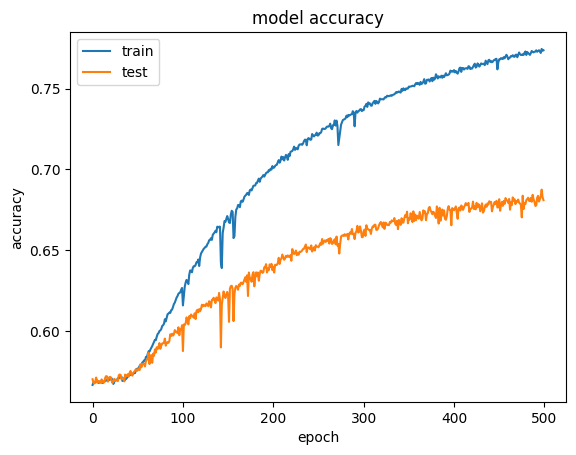

In [14]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



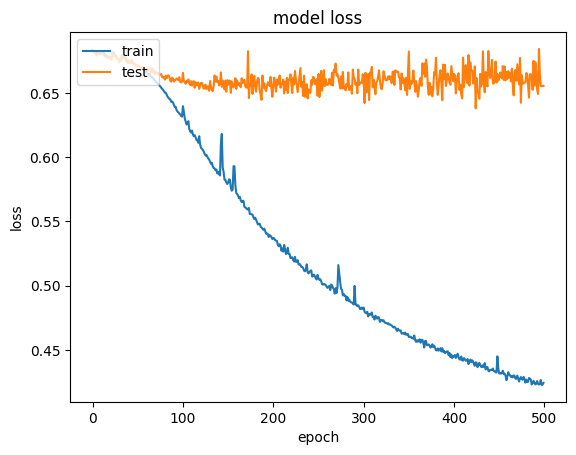

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
# Create balanced data

#use stratify for split   
X_train_rsp_val, X_test_rsp_val, y_train_rsp_val, y_test_rsp_val = train_test_split(rsp_deap_data, y_valence, test_size=0.2, random_state=42, stratify=y_valence)

#oversample

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_rsp_val, y_train_rsp_val)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test_rsp_val, y_test_rsp_val)


from collections import Counter
 # summarize observations by class labeL
counter = Counter(y_train_resampled)
print(counter) 

#convert binarized label (0 and 1) into categorical data- this generates 2 classes
#y_valence = np.array(data_binarizer([el[0] for el in rsp_deap_label],5,5))
Z1 = np.ravel(y_train_resampled)
y_train_resampled = to_categorical(Z1)
#y_train1
Z2 = np.ravel(y_test_resampled)
y_test_resampled = to_categorical(Z2)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(X_train_resampled)
testing_set_scaled = sc.transform(X_test_resampled)

#sc.data_min_
#sc.data_max_
n_features = 1
x_train = training_set_scaled.reshape(training_set_scaled.shape[0], training_set_scaled.shape[1],n_features )
x_test = testing_set_scaled.reshape(testing_set_scaled.shape[0], testing_set_scaled.shape[1], n_features)
print(x_train.shape)
print(x_test.shape)

Counter({1: 143062, 0: 143062})
(286124, 128, 1)
(71532, 128, 1)


In [15]:
#Best model - 65% accuracy on balanced resp deap data

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=500, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/500
1118/1118 - 41s - loss: 0.6918 - accuracy: 0.5205 - val_loss: 0.6918 - val_accuracy: 0.5172
Epoch 2/500
1118/1118 - 37s - loss: 0.6911 - accuracy: 0.5248 - val_loss: 0.6909 - val_accuracy: 0.5260
Epoch 3/500
1118/1118 - 37s - loss: 0.6908 - accuracy: 0.5265 - val_loss: 0.6908 - val_accuracy: 0.5237
Epoch 4/500
1118/1118 - 37s - loss: 0.6905 - accuracy: 0.5277 - val_loss: 0.6899 - val_accuracy: 0.5304
Epoch 5/500
1118/1118 - 37s - loss: 0.6903 - accuracy: 0.5282 - val_loss: 0.6895 - val_accuracy: 0.5320
Epoch 6/500
1118/1118 - 37s - loss: 0.6897 - accuracy: 0.5310 - val_loss: 0.6896 - val_accuracy: 0.5309
Epoch 7/500
1118/1118 - 37s - loss: 0.6892 - accuracy: 0.5326 - val_loss: 0.6880 - val_accuracy: 0.5321
Epoch 8/500
1118/1118 - 37s - loss: 0.6885 - accuracy: 0.5356 - val_loss: 0.6883 - val_accuracy: 0.5382
Epoch 9/500
1118/1118 - 37s - loss: 0.6881 - accuracy: 0.5392 - val_loss: 0.6877 - val_accuracy: 0.5403
Epoch 10/500
1118/1118 - 37s - loss: 0.6872 - accuracy: 0.5411 -

1118/1118 - 37s - loss: 0.6554 - accuracy: 0.5911 - val_loss: 0.6721 - val_accuracy: 0.5756
Epoch 80/500
1118/1118 - 37s - loss: 0.6538 - accuracy: 0.5923 - val_loss: 0.6750 - val_accuracy: 0.5769
Epoch 81/500
1118/1118 - 37s - loss: 0.6526 - accuracy: 0.5950 - val_loss: 0.6743 - val_accuracy: 0.5747
Epoch 82/500
1118/1118 - 37s - loss: 0.6523 - accuracy: 0.5956 - val_loss: 0.6780 - val_accuracy: 0.5760
Epoch 83/500
1118/1118 - 37s - loss: 0.6503 - accuracy: 0.5968 - val_loss: 0.6767 - val_accuracy: 0.5756
Epoch 84/500
1118/1118 - 37s - loss: 0.6499 - accuracy: 0.5968 - val_loss: 0.6735 - val_accuracy: 0.5794
Epoch 85/500
1118/1118 - 37s - loss: 0.6481 - accuracy: 0.5993 - val_loss: 0.6740 - val_accuracy: 0.5801
Epoch 86/500
1118/1118 - 37s - loss: 0.6468 - accuracy: 0.6002 - val_loss: 0.6727 - val_accuracy: 0.5775
Epoch 87/500
1118/1118 - 37s - loss: 0.6454 - accuracy: 0.6011 - val_loss: 0.6771 - val_accuracy: 0.5798
Epoch 88/500
1118/1118 - 37s - loss: 0.6448 - accuracy: 0.6030 - val

Epoch 157/500
1118/1118 - 37s - loss: 0.5731 - accuracy: 0.6621 - val_loss: 0.6726 - val_accuracy: 0.6121
Epoch 158/500
1118/1118 - 37s - loss: 0.5724 - accuracy: 0.6638 - val_loss: 0.6690 - val_accuracy: 0.6123
Epoch 159/500
1118/1118 - 37s - loss: 0.5721 - accuracy: 0.6641 - val_loss: 0.6700 - val_accuracy: 0.6121
Epoch 160/500
1118/1118 - 37s - loss: 0.5699 - accuracy: 0.6649 - val_loss: 0.6723 - val_accuracy: 0.6142
Epoch 161/500
1118/1118 - 37s - loss: 0.5688 - accuracy: 0.6662 - val_loss: 0.6783 - val_accuracy: 0.6125
Epoch 162/500
1118/1118 - 37s - loss: 0.5697 - accuracy: 0.6661 - val_loss: 0.6677 - val_accuracy: 0.6124
Epoch 163/500
1118/1118 - 37s - loss: 0.5690 - accuracy: 0.6668 - val_loss: 0.6771 - val_accuracy: 0.6118
Epoch 164/500
1118/1118 - 37s - loss: 0.5683 - accuracy: 0.6668 - val_loss: 0.6774 - val_accuracy: 0.6122
Epoch 165/500
1118/1118 - 37s - loss: 0.5674 - accuracy: 0.6680 - val_loss: 0.6735 - val_accuracy: 0.6150
Epoch 166/500
1118/1118 - 37s - loss: 0.5665 -

Epoch 235/500
1118/1118 - 37s - loss: 0.5219 - accuracy: 0.6988 - val_loss: 0.6727 - val_accuracy: 0.6294
Epoch 236/500
1118/1118 - 37s - loss: 0.5191 - accuracy: 0.7011 - val_loss: 0.6796 - val_accuracy: 0.6299
Epoch 237/500
1118/1118 - 37s - loss: 0.5191 - accuracy: 0.7007 - val_loss: 0.6719 - val_accuracy: 0.6326
Epoch 238/500
1118/1118 - 37s - loss: 0.5180 - accuracy: 0.7012 - val_loss: 0.6778 - val_accuracy: 0.6311
Epoch 239/500
1118/1118 - 37s - loss: 0.5169 - accuracy: 0.7016 - val_loss: 0.6848 - val_accuracy: 0.6303
Epoch 240/500
1118/1118 - 37s - loss: 0.5180 - accuracy: 0.7009 - val_loss: 0.6880 - val_accuracy: 0.6290
Epoch 241/500
1118/1118 - 37s - loss: 0.5210 - accuracy: 0.6990 - val_loss: 0.6797 - val_accuracy: 0.6293
Epoch 242/500
1118/1118 - 37s - loss: 0.5160 - accuracy: 0.7031 - val_loss: 0.6817 - val_accuracy: 0.6328
Epoch 243/500
1118/1118 - 37s - loss: 0.5159 - accuracy: 0.7033 - val_loss: 0.6802 - val_accuracy: 0.6329
Epoch 244/500
1118/1118 - 37s - loss: 0.5155 -

Epoch 313/500
1118/1118 - 37s - loss: 0.4856 - accuracy: 0.7218 - val_loss: 0.6834 - val_accuracy: 0.6397
Epoch 314/500
1118/1118 - 37s - loss: 0.4877 - accuracy: 0.7204 - val_loss: 0.6820 - val_accuracy: 0.6406
Epoch 315/500
1118/1118 - 37s - loss: 0.4880 - accuracy: 0.7208 - val_loss: 0.6743 - val_accuracy: 0.6402
Epoch 316/500
1118/1118 - 37s - loss: 0.4867 - accuracy: 0.7205 - val_loss: 0.6873 - val_accuracy: 0.6395
Epoch 317/500
1118/1118 - 37s - loss: 0.4850 - accuracy: 0.7225 - val_loss: 0.6828 - val_accuracy: 0.6406
Epoch 318/500
1118/1118 - 37s - loss: 0.4863 - accuracy: 0.7221 - val_loss: 0.6837 - val_accuracy: 0.6418
Epoch 319/500
1118/1118 - 37s - loss: 0.4847 - accuracy: 0.7224 - val_loss: 0.7106 - val_accuracy: 0.6397
Epoch 320/500
1118/1118 - 37s - loss: 0.4849 - accuracy: 0.7231 - val_loss: 0.6875 - val_accuracy: 0.6414
Epoch 321/500
1118/1118 - 37s - loss: 0.4842 - accuracy: 0.7225 - val_loss: 0.6964 - val_accuracy: 0.6411
Epoch 322/500
1118/1118 - 37s - loss: 0.4847 -

Epoch 391/500
1118/1118 - 37s - loss: 0.5032 - accuracy: 0.7110 - val_loss: 0.6567 - val_accuracy: 0.6118
Epoch 392/500
1118/1118 - 37s - loss: 0.5467 - accuracy: 0.6812 - val_loss: 0.6507 - val_accuracy: 0.6256
Epoch 393/500
1118/1118 - 37s - loss: 0.5372 - accuracy: 0.6879 - val_loss: 0.6593 - val_accuracy: 0.6339
Epoch 394/500
1118/1118 - 37s - loss: 0.5153 - accuracy: 0.7035 - val_loss: 0.6721 - val_accuracy: 0.6277
Epoch 395/500
1118/1118 - 37s - loss: 0.5095 - accuracy: 0.7078 - val_loss: 0.6596 - val_accuracy: 0.6411
Epoch 396/500
1118/1118 - 37s - loss: 0.4995 - accuracy: 0.7143 - val_loss: 0.6841 - val_accuracy: 0.6084
Epoch 397/500
1118/1118 - 37s - loss: 0.6108 - accuracy: 0.6367 - val_loss: 0.6538 - val_accuracy: 0.6199
Epoch 398/500
1118/1118 - 37s - loss: 0.5461 - accuracy: 0.6863 - val_loss: 0.6615 - val_accuracy: 0.6325
Epoch 399/500
1118/1118 - 37s - loss: 0.5186 - accuracy: 0.7031 - val_loss: 0.6680 - val_accuracy: 0.6384
Epoch 400/500
1118/1118 - 37s - loss: 0.5058 -

Epoch 469/500
1118/1118 - 37s - loss: 0.6411 - accuracy: 0.6067 - val_loss: 0.6594 - val_accuracy: 0.5921
Epoch 470/500
1118/1118 - 37s - loss: 0.6332 - accuracy: 0.6160 - val_loss: 0.6694 - val_accuracy: 0.5849
Epoch 471/500
1118/1118 - 37s - loss: 0.6131 - accuracy: 0.6349 - val_loss: 0.6550 - val_accuracy: 0.6070
Epoch 472/500
1118/1118 - 37s - loss: 0.6006 - accuracy: 0.6445 - val_loss: 0.6586 - val_accuracy: 0.6068
Epoch 473/500
1118/1118 - 37s - loss: 0.6087 - accuracy: 0.6379 - val_loss: 0.6554 - val_accuracy: 0.6086
Epoch 474/500
1118/1118 - 37s - loss: 0.6030 - accuracy: 0.6416 - val_loss: 0.6595 - val_accuracy: 0.6009
Epoch 475/500
1118/1118 - 37s - loss: 0.5998 - accuracy: 0.6448 - val_loss: 0.6579 - val_accuracy: 0.6112
Epoch 476/500
1118/1118 - 37s - loss: 0.5856 - accuracy: 0.6569 - val_loss: 0.6551 - val_accuracy: 0.6155
Epoch 477/500
1118/1118 - 37s - loss: 0.5850 - accuracy: 0.6578 - val_loss: 0.6515 - val_accuracy: 0.6200
Epoch 478/500
1118/1118 - 37s - loss: 0.5744 -

In [6]:
#Increase epoch to 1000 to get 69% accuracy
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=1000, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/1000
1118/1118 - 64s - loss: 0.6917 - accuracy: 0.5219 - val_loss: 0.6909 - val_accuracy: 0.5237
Epoch 2/1000
1118/1118 - 39s - loss: 0.6909 - accuracy: 0.5255 - val_loss: 0.6906 - val_accuracy: 0.5277
Epoch 3/1000
1118/1118 - 39s - loss: 0.6906 - accuracy: 0.5272 - val_loss: 0.6903 - val_accuracy: 0.5283
Epoch 4/1000
1118/1118 - 38s - loss: 0.6903 - accuracy: 0.5287 - val_loss: 0.6890 - val_accuracy: 0.5298
Epoch 5/1000
1118/1118 - 39s - loss: 0.6895 - accuracy: 0.5306 - val_loss: 0.6887 - val_accuracy: 0.5279
Epoch 6/1000
1118/1118 - 39s - loss: 0.6886 - accuracy: 0.5351 - val_loss: 0.6885 - val_accuracy: 0.5339
Epoch 7/1000
1118/1118 - 38s - loss: 0.6880 - accuracy: 0.5384 - val_loss: 0.6873 - val_accuracy: 0.5421
Epoch 8/1000
1118/1118 - 38s - loss: 0.6874 - accuracy: 0.5407 - val_loss: 0.6870 - val_accuracy: 0.5422
Epoch 9/1000
1118/1118 - 39s - loss: 0.6871 - accuracy: 0.5399 - val_loss: 0.6872 - val_accuracy: 0.5413
Epoch 10/1000
1118/1118 - 39s - loss: 0.6868 - accuracy

Epoch 79/1000
1118/1118 - 38s - loss: 0.6488 - accuracy: 0.6009 - val_loss: 0.6717 - val_accuracy: 0.5799
Epoch 80/1000
1118/1118 - 39s - loss: 0.6471 - accuracy: 0.6029 - val_loss: 0.6725 - val_accuracy: 0.5821
Epoch 81/1000
1118/1118 - 39s - loss: 0.6459 - accuracy: 0.6043 - val_loss: 0.6732 - val_accuracy: 0.5821
Epoch 82/1000
1118/1118 - 38s - loss: 0.6454 - accuracy: 0.6046 - val_loss: 0.6701 - val_accuracy: 0.5833
Epoch 83/1000
1118/1118 - 38s - loss: 0.6427 - accuracy: 0.6075 - val_loss: 0.6743 - val_accuracy: 0.5799
Epoch 84/1000
1118/1118 - 38s - loss: 0.6421 - accuracy: 0.6094 - val_loss: 0.6716 - val_accuracy: 0.5835
Epoch 85/1000
1118/1118 - 38s - loss: 0.6413 - accuracy: 0.6088 - val_loss: 0.6743 - val_accuracy: 0.5836
Epoch 86/1000
1118/1118 - 38s - loss: 0.6398 - accuracy: 0.6109 - val_loss: 0.6764 - val_accuracy: 0.5845
Epoch 87/1000
1118/1118 - 38s - loss: 0.6391 - accuracy: 0.6122 - val_loss: 0.6743 - val_accuracy: 0.5870
Epoch 88/1000
1118/1118 - 38s - loss: 0.6378 -

Epoch 156/1000
1118/1118 - 39s - loss: 0.5634 - accuracy: 0.6721 - val_loss: 0.6677 - val_accuracy: 0.6173
Epoch 157/1000
1118/1118 - 39s - loss: 0.5619 - accuracy: 0.6717 - val_loss: 0.6744 - val_accuracy: 0.6145
Epoch 158/1000
1118/1118 - 39s - loss: 0.5626 - accuracy: 0.6714 - val_loss: 0.6696 - val_accuracy: 0.6167
Epoch 159/1000
1118/1118 - 40s - loss: 0.5593 - accuracy: 0.6741 - val_loss: 0.6666 - val_accuracy: 0.6143
Epoch 160/1000
1118/1118 - 38s - loss: 0.5580 - accuracy: 0.6749 - val_loss: 0.6734 - val_accuracy: 0.6162
Epoch 161/1000
1118/1118 - 39s - loss: 0.5575 - accuracy: 0.6758 - val_loss: 0.6713 - val_accuracy: 0.6189
Epoch 162/1000
1118/1118 - 38s - loss: 0.5581 - accuracy: 0.6758 - val_loss: 0.6682 - val_accuracy: 0.6169
Epoch 163/1000
1118/1118 - 38s - loss: 0.5568 - accuracy: 0.6756 - val_loss: 0.6693 - val_accuracy: 0.6186
Epoch 164/1000
1118/1118 - 38s - loss: 0.5577 - accuracy: 0.6753 - val_loss: 0.6671 - val_accuracy: 0.6213
Epoch 165/1000
1118/1118 - 39s - loss

Epoch 233/1000
1118/1118 - 39s - loss: 0.5093 - accuracy: 0.7090 - val_loss: 0.6701 - val_accuracy: 0.6368
Epoch 234/1000
1118/1118 - 39s - loss: 0.5096 - accuracy: 0.7086 - val_loss: 0.6748 - val_accuracy: 0.6367
Epoch 235/1000
1118/1118 - 39s - loss: 0.5097 - accuracy: 0.7092 - val_loss: 0.6730 - val_accuracy: 0.6346
Epoch 236/1000
1118/1118 - 39s - loss: 0.5086 - accuracy: 0.7094 - val_loss: 0.6730 - val_accuracy: 0.6383
Epoch 237/1000
1118/1118 - 38s - loss: 0.5081 - accuracy: 0.7094 - val_loss: 0.6656 - val_accuracy: 0.6361
Epoch 238/1000
1118/1118 - 39s - loss: 0.5080 - accuracy: 0.7106 - val_loss: 0.6676 - val_accuracy: 0.6352
Epoch 239/1000
1118/1118 - 38s - loss: 0.5045 - accuracy: 0.7117 - val_loss: 0.6738 - val_accuracy: 0.6366
Epoch 240/1000
1118/1118 - 38s - loss: 0.5073 - accuracy: 0.7108 - val_loss: 0.6678 - val_accuracy: 0.6397
Epoch 241/1000
1118/1118 - 38s - loss: 0.5053 - accuracy: 0.7118 - val_loss: 0.6678 - val_accuracy: 0.6397
Epoch 242/1000
1118/1118 - 38s - loss

Epoch 310/1000
1118/1118 - 38s - loss: 0.4742 - accuracy: 0.7326 - val_loss: 0.6710 - val_accuracy: 0.6499
Epoch 311/1000
1118/1118 - 38s - loss: 0.4762 - accuracy: 0.7313 - val_loss: 0.6685 - val_accuracy: 0.6508
Epoch 312/1000
1118/1118 - 38s - loss: 0.4757 - accuracy: 0.7311 - val_loss: 0.6623 - val_accuracy: 0.6496
Epoch 313/1000
1118/1118 - 38s - loss: 0.4746 - accuracy: 0.7321 - val_loss: 0.6609 - val_accuracy: 0.6487
Epoch 314/1000
1118/1118 - 39s - loss: 0.4733 - accuracy: 0.7325 - val_loss: 0.6596 - val_accuracy: 0.6462
Epoch 315/1000
1118/1118 - 38s - loss: 0.4737 - accuracy: 0.7332 - val_loss: 0.6673 - val_accuracy: 0.6480
Epoch 316/1000
1118/1118 - 38s - loss: 0.4710 - accuracy: 0.7350 - val_loss: 0.6714 - val_accuracy: 0.6544
Epoch 317/1000
1118/1118 - 38s - loss: 0.4727 - accuracy: 0.7330 - val_loss: 0.6673 - val_accuracy: 0.6497
Epoch 318/1000
1118/1118 - 38s - loss: 0.4712 - accuracy: 0.7345 - val_loss: 0.6688 - val_accuracy: 0.6532
Epoch 319/1000
1118/1118 - 38s - loss

Epoch 387/1000
1118/1118 - 38s - loss: 0.4475 - accuracy: 0.7496 - val_loss: 0.6710 - val_accuracy: 0.6586
Epoch 388/1000
1118/1118 - 39s - loss: 0.4527 - accuracy: 0.7464 - val_loss: 0.6688 - val_accuracy: 0.6596
Epoch 389/1000
1118/1118 - 38s - loss: 0.4505 - accuracy: 0.7491 - val_loss: 0.6742 - val_accuracy: 0.6567
Epoch 390/1000
1118/1118 - 38s - loss: 0.4499 - accuracy: 0.7479 - val_loss: 0.6797 - val_accuracy: 0.6589
Epoch 391/1000
1118/1118 - 38s - loss: 0.4490 - accuracy: 0.7492 - val_loss: 0.6757 - val_accuracy: 0.6593
Epoch 392/1000
1118/1118 - 38s - loss: 0.4528 - accuracy: 0.7467 - val_loss: 0.6660 - val_accuracy: 0.6570
Epoch 393/1000
1118/1118 - 38s - loss: 0.4481 - accuracy: 0.7494 - val_loss: 0.6752 - val_accuracy: 0.6588
Epoch 394/1000
1118/1118 - 38s - loss: 0.4489 - accuracy: 0.7492 - val_loss: 0.6866 - val_accuracy: 0.6579
Epoch 395/1000
1118/1118 - 38s - loss: 0.4474 - accuracy: 0.7495 - val_loss: 0.6755 - val_accuracy: 0.6583
Epoch 396/1000
1118/1118 - 38s - loss

Epoch 464/1000
1118/1118 - 38s - loss: 0.4310 - accuracy: 0.7604 - val_loss: 0.6669 - val_accuracy: 0.6670
Epoch 465/1000
1118/1118 - 38s - loss: 0.4310 - accuracy: 0.7606 - val_loss: 0.6987 - val_accuracy: 0.6589
Epoch 466/1000
1118/1118 - 39s - loss: 0.4296 - accuracy: 0.7610 - val_loss: 0.6899 - val_accuracy: 0.6660
Epoch 467/1000
1118/1118 - 38s - loss: 0.4302 - accuracy: 0.7615 - val_loss: 0.6719 - val_accuracy: 0.6679
Epoch 468/1000
1118/1118 - 38s - loss: 0.4284 - accuracy: 0.7626 - val_loss: 0.6739 - val_accuracy: 0.6687
Epoch 469/1000
1118/1118 - 38s - loss: 0.4333 - accuracy: 0.7601 - val_loss: 0.6884 - val_accuracy: 0.6638
Epoch 470/1000
1118/1118 - 38s - loss: 0.4295 - accuracy: 0.7621 - val_loss: 0.6602 - val_accuracy: 0.6675
Epoch 471/1000
1118/1118 - 38s - loss: 0.4306 - accuracy: 0.7604 - val_loss: 0.6661 - val_accuracy: 0.6679
Epoch 472/1000
1118/1118 - 38s - loss: 0.4319 - accuracy: 0.7616 - val_loss: 0.6831 - val_accuracy: 0.6676
Epoch 473/1000
1118/1118 - 38s - loss

Epoch 541/1000
1118/1118 - 38s - loss: 0.4169 - accuracy: 0.7695 - val_loss: 0.6802 - val_accuracy: 0.6689
Epoch 542/1000
1118/1118 - 38s - loss: 0.4151 - accuracy: 0.7706 - val_loss: 0.6789 - val_accuracy: 0.6708
Epoch 543/1000
1118/1118 - 38s - loss: 0.4151 - accuracy: 0.7707 - val_loss: 0.6687 - val_accuracy: 0.6751
Epoch 544/1000
1118/1118 - 38s - loss: 0.4149 - accuracy: 0.7712 - val_loss: 0.6758 - val_accuracy: 0.6764
Epoch 545/1000
1118/1118 - 38s - loss: 0.4151 - accuracy: 0.7709 - val_loss: 0.6725 - val_accuracy: 0.6769
Epoch 546/1000
1118/1118 - 38s - loss: 0.4176 - accuracy: 0.7703 - val_loss: 0.6670 - val_accuracy: 0.6752
Epoch 547/1000
1118/1118 - 38s - loss: 0.4165 - accuracy: 0.7702 - val_loss: 0.6831 - val_accuracy: 0.6748
Epoch 548/1000
1118/1118 - 38s - loss: 0.4165 - accuracy: 0.7705 - val_loss: 0.6844 - val_accuracy: 0.6717
Epoch 549/1000
1118/1118 - 38s - loss: 0.4171 - accuracy: 0.7699 - val_loss: 0.6635 - val_accuracy: 0.6746
Epoch 550/1000
1118/1118 - 38s - loss

Epoch 618/1000
1118/1118 - 38s - loss: 0.4171 - accuracy: 0.7730 - val_loss: 0.6821 - val_accuracy: 0.6730
Epoch 619/1000
1118/1118 - 38s - loss: 0.4052 - accuracy: 0.7780 - val_loss: 0.6771 - val_accuracy: 0.6732
Epoch 620/1000
1118/1118 - 38s - loss: 0.4041 - accuracy: 0.7779 - val_loss: 0.6765 - val_accuracy: 0.6768
Epoch 621/1000
1118/1118 - 38s - loss: 0.4038 - accuracy: 0.7781 - val_loss: 0.6791 - val_accuracy: 0.6762
Epoch 622/1000
1118/1118 - 38s - loss: 0.4053 - accuracy: 0.7785 - val_loss: 0.6681 - val_accuracy: 0.6721
Epoch 623/1000
1118/1118 - 38s - loss: 0.4067 - accuracy: 0.7765 - val_loss: 0.6650 - val_accuracy: 0.6794
Epoch 624/1000
1118/1118 - 38s - loss: 0.4045 - accuracy: 0.7792 - val_loss: 0.6653 - val_accuracy: 0.6782
Epoch 625/1000
1118/1118 - 38s - loss: 0.4362 - accuracy: 0.7527 - val_loss: 0.6779 - val_accuracy: 0.6671
Epoch 626/1000
1118/1118 - 39s - loss: 0.4096 - accuracy: 0.7737 - val_loss: 0.6694 - val_accuracy: 0.6775
Epoch 627/1000
1118/1118 - 39s - loss

Epoch 695/1000
1118/1118 - 38s - loss: 0.3966 - accuracy: 0.7840 - val_loss: 0.6660 - val_accuracy: 0.6814
Epoch 696/1000
1118/1118 - 38s - loss: 0.3950 - accuracy: 0.7839 - val_loss: 0.6668 - val_accuracy: 0.6772
Epoch 697/1000
1118/1118 - 38s - loss: 0.3953 - accuracy: 0.7843 - val_loss: 0.6571 - val_accuracy: 0.6821
Epoch 698/1000
1118/1118 - 38s - loss: 0.3964 - accuracy: 0.7840 - val_loss: 0.6741 - val_accuracy: 0.6808
Epoch 699/1000
1118/1118 - 38s - loss: 0.3964 - accuracy: 0.7841 - val_loss: 0.6743 - val_accuracy: 0.6810
Epoch 700/1000
1118/1118 - 38s - loss: 0.3968 - accuracy: 0.7835 - val_loss: 0.6855 - val_accuracy: 0.6776
Epoch 701/1000
1118/1118 - 38s - loss: 0.3940 - accuracy: 0.7846 - val_loss: 0.6825 - val_accuracy: 0.6730
Epoch 702/1000
1118/1118 - 38s - loss: 0.3992 - accuracy: 0.7822 - val_loss: 0.6690 - val_accuracy: 0.6822
Epoch 703/1000
1118/1118 - 38s - loss: 0.3958 - accuracy: 0.7839 - val_loss: 0.6857 - val_accuracy: 0.6796
Epoch 704/1000
1118/1118 - 38s - loss

Epoch 772/1000
1118/1118 - 39s - loss: 0.3878 - accuracy: 0.7891 - val_loss: 0.6702 - val_accuracy: 0.6851
Epoch 773/1000
1118/1118 - 39s - loss: 0.3861 - accuracy: 0.7904 - val_loss: 0.6716 - val_accuracy: 0.6767
Epoch 774/1000
1118/1118 - 39s - loss: 0.3870 - accuracy: 0.7899 - val_loss: 0.6756 - val_accuracy: 0.6877
Epoch 775/1000
1118/1118 - 39s - loss: 0.3867 - accuracy: 0.7914 - val_loss: 0.6770 - val_accuracy: 0.6857
Epoch 776/1000
1118/1118 - 38s - loss: 0.3912 - accuracy: 0.7884 - val_loss: 0.6776 - val_accuracy: 0.6819
Epoch 777/1000
1118/1118 - 38s - loss: 0.3876 - accuracy: 0.7896 - val_loss: 0.6707 - val_accuracy: 0.6853
Epoch 778/1000
1118/1118 - 38s - loss: 0.3855 - accuracy: 0.7910 - val_loss: 0.6788 - val_accuracy: 0.6857
Epoch 779/1000
1118/1118 - 38s - loss: 0.3850 - accuracy: 0.7903 - val_loss: 0.6906 - val_accuracy: 0.6836
Epoch 780/1000
1118/1118 - 38s - loss: 0.3913 - accuracy: 0.7882 - val_loss: 0.6599 - val_accuracy: 0.6893
Epoch 781/1000
1118/1118 - 38s - loss

Epoch 849/1000
1118/1118 - 38s - loss: 0.3926 - accuracy: 0.7875 - val_loss: 0.6561 - val_accuracy: 0.6632
Epoch 850/1000
1118/1118 - 38s - loss: 0.3854 - accuracy: 0.7918 - val_loss: 0.6730 - val_accuracy: 0.6860
Epoch 851/1000
1118/1118 - 38s - loss: 0.3855 - accuracy: 0.7929 - val_loss: 0.6599 - val_accuracy: 0.6831
Epoch 852/1000
1118/1118 - 39s - loss: 0.3823 - accuracy: 0.7944 - val_loss: 0.6756 - val_accuracy: 0.6802
Epoch 853/1000
1118/1118 - 38s - loss: 0.3785 - accuracy: 0.7957 - val_loss: 0.6865 - val_accuracy: 0.6869
Epoch 854/1000
1118/1118 - 38s - loss: 0.3781 - accuracy: 0.7960 - val_loss: 0.6899 - val_accuracy: 0.6888
Epoch 855/1000
1118/1118 - 38s - loss: 0.3771 - accuracy: 0.7965 - val_loss: 0.6897 - val_accuracy: 0.6742
Epoch 856/1000
1118/1118 - 38s - loss: 0.3787 - accuracy: 0.7952 - val_loss: 0.6858 - val_accuracy: 0.6888
Epoch 857/1000
1118/1118 - 38s - loss: 0.3777 - accuracy: 0.7967 - val_loss: 0.6770 - val_accuracy: 0.6894
Epoch 858/1000
1118/1118 - 38s - loss

Epoch 926/1000
1118/1118 - 38s - loss: 0.3729 - accuracy: 0.7990 - val_loss: 0.6614 - val_accuracy: 0.6891
Epoch 927/1000
1118/1118 - 38s - loss: 0.3755 - accuracy: 0.7979 - val_loss: 0.6564 - val_accuracy: 0.6899
Epoch 928/1000
1118/1118 - 38s - loss: 0.3711 - accuracy: 0.8003 - val_loss: 0.6784 - val_accuracy: 0.6904
Epoch 929/1000
1118/1118 - 38s - loss: 0.3717 - accuracy: 0.7998 - val_loss: 0.6726 - val_accuracy: 0.6894
Epoch 930/1000
1118/1118 - 38s - loss: 0.3746 - accuracy: 0.7989 - val_loss: 0.6742 - val_accuracy: 0.6896
Epoch 931/1000
1118/1118 - 39s - loss: 0.3722 - accuracy: 0.7998 - val_loss: 0.6929 - val_accuracy: 0.6775
Epoch 932/1000
1118/1118 - 39s - loss: 0.3710 - accuracy: 0.8010 - val_loss: 0.7007 - val_accuracy: 0.6830
Epoch 933/1000
1118/1118 - 39s - loss: 0.3712 - accuracy: 0.8005 - val_loss: 0.6759 - val_accuracy: 0.6929
Epoch 934/1000
1118/1118 - 39s - loss: 0.3709 - accuracy: 0.7991 - val_loss: 0.6989 - val_accuracy: 0.6848
Epoch 935/1000
1118/1118 - 39s - loss

In [9]:
# Save entire model to a HDF5 file
model.save('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/LSTM/saved_models/conv1d_blstm_slider128_rsp_raw_overlap32_balanced_ep1000_bs256.h5')

In [10]:
# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('C:/Users/Sowmya/OneDrive - Athlone Institute Of Technology/PhD/DEAP/DATABASE/Python code/LSTM/saved_models//conv1d_blstm_slider128_rsp_raw_overlap32_balanced_ep1000_bs256.h5')
loss, acc = new_model.evaluate(x_test, y_test_resampled)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

2236/2236 [==============================] - 21s 8ms/step - loss: 0.6715 - accuracy: 0.6904
Restored model, accuracy: 69.04%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


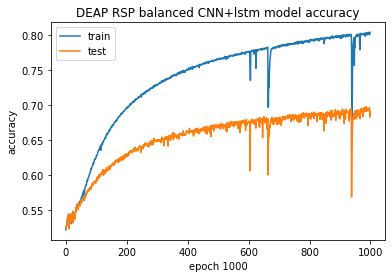

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DEAP RSP balanced CNN+lstm model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch 1000')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


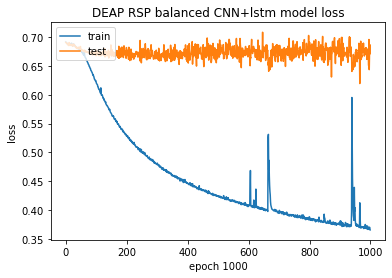

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DEAP RSP balanced CNN+lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch 1000')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#Ashima inputs - add embeddings, bacth normalization (increase training time) increase neurons and add layers 

#Add conv1d extra and batchnormalization
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=10, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/10
1118/1118 - 57s - loss: 0.7104 - accuracy: 0.5158 - val_loss: 0.6904 - val_accuracy: 0.5285
Epoch 2/10
1118/1118 - 50s - loss: 0.6910 - accuracy: 0.5236 - val_loss: 0.6919 - val_accuracy: 0.5222
Epoch 3/10
1118/1118 - 50s - loss: 0.6905 - accuracy: 0.5257 - val_loss: 0.6916 - val_accuracy: 0.5225
Epoch 4/10
1118/1118 - 50s - loss: 0.6901 - accuracy: 0.5261 - val_loss: 0.6910 - val_accuracy: 0.5261
Epoch 5/10
1118/1118 - 50s - loss: 0.6901 - accuracy: 0.5284 - val_loss: 0.6905 - val_accuracy: 0.5245
Epoch 6/10
1118/1118 - 50s - loss: 0.6901 - accuracy: 0.5278 - val_loss: 0.6909 - val_accuracy: 0.5256
Epoch 7/10
1118/1118 - 50s - loss: 0.6896 - accuracy: 0.5298 - val_loss: 0.6891 - val_accuracy: 0.5263
Epoch 8/10
1118/1118 - 50s - loss: 0.6894 - accuracy: 0.5290 - val_loss: 0.6893 - val_accuracy: 0.5371
Epoch 9/10
1118/1118 - 50s - loss: 0.6885 - accuracy: 0.5334 - val_loss: 0.6879 - val_accuracy: 0.5365
Epoch 10/10
1118/1118 - 50s - loss: 0.6880 - accuracy: 0.5358 - val_loss:

In [14]:
#Ashima inputs - add embeddings, bacth normalization (increase training time) increase neurons and add layers 

##Add conv1d extra and batchnormalization and increase bilstm neurons to 128
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
#model.add(Dropout(0.3)) - DONT ADD here.. get loss: nan
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=20, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/20
1118/1118 - 81s - loss: 0.7087 - accuracy: 0.5158 - val_loss: 0.6913 - val_accuracy: 0.5211
Epoch 2/20
1118/1118 - 75s - loss: 0.6911 - accuracy: 0.5244 - val_loss: 0.6903 - val_accuracy: 0.5251
Epoch 3/20
1118/1118 - 75s - loss: 0.6913 - accuracy: 0.5224 - val_loss: 0.6915 - val_accuracy: 0.5269
Epoch 4/20
1118/1118 - 75s - loss: 0.6908 - accuracy: 0.5251 - val_loss: 0.6918 - val_accuracy: 0.5078
Epoch 5/20
1118/1118 - 76s - loss: 0.6912 - accuracy: 0.5241 - val_loss: 0.6905 - val_accuracy: 0.5230
Epoch 6/20
1118/1118 - 76s - loss: 0.6904 - accuracy: 0.5248 - val_loss: 0.6913 - val_accuracy: 0.5142
Epoch 7/20
1118/1118 - 76s - loss: 0.6904 - accuracy: 0.5263 - val_loss: 0.6901 - val_accuracy: 0.5257
Epoch 8/20
1118/1118 - 76s - loss: 0.6902 - accuracy: 0.5255 - val_loss: 0.6900 - val_accuracy: 0.5287
Epoch 9/20
1118/1118 - 76s - loss: 0.6895 - accuracy: 0.5275 - val_loss: 0.6948 - val_accuracy: 0.5230
Epoch 10/20
1118/1118 - 75s - loss: 0.6897 - accuracy: 0.5273 - val_loss:

In [22]:
#Ashima inputs - add embeddings, bacth normalization (increase training time) increase neurons and add layers 

##Add conv1d extra and batchnormalization and gru INSTEAD OF BILSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
model.add(GRU(64))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=200, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/200
1118/1118 - 33s - loss: 0.7052 - accuracy: 0.5127 - val_loss: 0.6913 - val_accuracy: 0.5189
Epoch 2/200
1118/1118 - 28s - loss: 0.6913 - accuracy: 0.5222 - val_loss: 0.6906 - val_accuracy: 0.5221
Epoch 3/200
1118/1118 - 29s - loss: 0.6898 - accuracy: 0.5274 - val_loss: 0.6888 - val_accuracy: 0.5295
Epoch 4/200
1118/1118 - 29s - loss: 0.6888 - accuracy: 0.5327 - val_loss: 0.6880 - val_accuracy: 0.5404
Epoch 5/200
1118/1118 - 29s - loss: 0.6874 - accuracy: 0.5361 - val_loss: 0.6862 - val_accuracy: 0.5447
Epoch 6/200
1118/1118 - 29s - loss: 0.6864 - accuracy: 0.5411 - val_loss: 0.6885 - val_accuracy: 0.5378
Epoch 7/200
1118/1118 - 29s - loss: 0.6857 - accuracy: 0.5426 - val_loss: 0.6953 - val_accuracy: 0.5329
Epoch 8/200
1118/1118 - 29s - loss: 0.6849 - accuracy: 0.5462 - val_loss: 0.6862 - val_accuracy: 0.5420
Epoch 9/200
1118/1118 - 29s - loss: 0.6839 - accuracy: 0.5492 - val_loss: 0.6840 - val_accuracy: 0.5495
Epoch 10/200
1118/1118 - 29s - loss: 0.6829 - accuracy: 0.5507 -

1118/1118 - 28s - loss: 0.6001 - accuracy: 0.6427 - val_loss: 0.6635 - val_accuracy: 0.6020
Epoch 80/200
1118/1118 - 28s - loss: 0.6000 - accuracy: 0.6441 - val_loss: 0.6526 - val_accuracy: 0.6015
Epoch 81/200
1118/1118 - 28s - loss: 0.6123 - accuracy: 0.6329 - val_loss: 0.6505 - val_accuracy: 0.6001
Epoch 82/200
1118/1118 - 28s - loss: 0.6013 - accuracy: 0.6424 - val_loss: 0.6479 - val_accuracy: 0.6078
Epoch 83/200
1118/1118 - 28s - loss: 0.5979 - accuracy: 0.6445 - val_loss: 0.6533 - val_accuracy: 0.6004
Epoch 84/200
1118/1118 - 28s - loss: 0.5967 - accuracy: 0.6459 - val_loss: 0.6646 - val_accuracy: 0.5975
Epoch 85/200
1118/1118 - 28s - loss: 0.5962 - accuracy: 0.6457 - val_loss: 0.6489 - val_accuracy: 0.6100
Epoch 86/200
1118/1118 - 28s - loss: 0.6181 - accuracy: 0.6279 - val_loss: 0.6499 - val_accuracy: 0.6045
Epoch 87/200
1118/1118 - 28s - loss: 0.6014 - accuracy: 0.6430 - val_loss: 0.6492 - val_accuracy: 0.6083
Epoch 88/200
1118/1118 - 28s - loss: 0.6188 - accuracy: 0.6255 - val

Epoch 157/200
1118/1118 - 28s - loss: 0.5639 - accuracy: 0.6742 - val_loss: 0.6381 - val_accuracy: 0.6259
Epoch 158/200
1118/1118 - 28s - loss: 0.5640 - accuracy: 0.6738 - val_loss: 0.6292 - val_accuracy: 0.6287
Epoch 159/200
1118/1118 - 28s - loss: 0.5644 - accuracy: 0.6745 - val_loss: 0.6509 - val_accuracy: 0.6172
Epoch 160/200
1118/1118 - 28s - loss: 0.5640 - accuracy: 0.6742 - val_loss: 0.6416 - val_accuracy: 0.6111
Epoch 161/200
1118/1118 - 28s - loss: 0.5646 - accuracy: 0.6730 - val_loss: 0.6397 - val_accuracy: 0.6200
Epoch 162/200
1118/1118 - 28s - loss: 0.5635 - accuracy: 0.6740 - val_loss: 0.6331 - val_accuracy: 0.6188
Epoch 163/200
1118/1118 - 28s - loss: 0.5636 - accuracy: 0.6740 - val_loss: 0.6553 - val_accuracy: 0.6108
Epoch 164/200
1118/1118 - 28s - loss: 0.5608 - accuracy: 0.6767 - val_loss: 0.6363 - val_accuracy: 0.6275
Epoch 165/200
1118/1118 - 28s - loss: 0.5619 - accuracy: 0.6757 - val_loss: 0.6508 - val_accuracy: 0.6111
Epoch 166/200
1118/1118 - 28s - loss: 0.5608 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


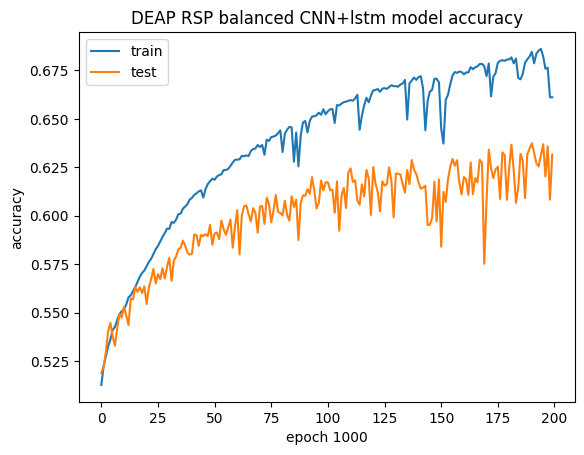

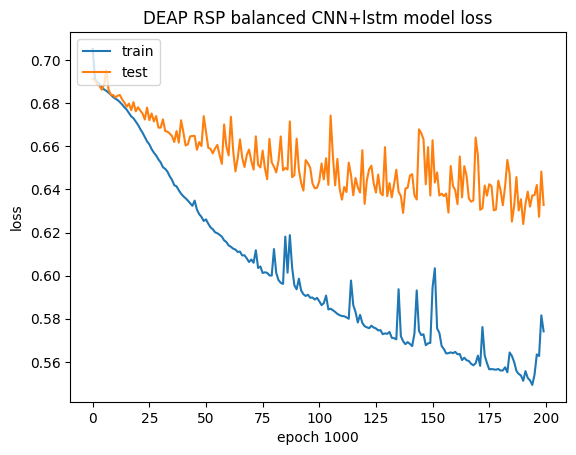

In [23]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DEAP RSP balanced CNN+lstm model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch 1000')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DEAP RSP balanced CNN+lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch 1000')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#Ashima inputs - add embeddings, bacth normalization (increase training time) increase neurons and add layers 

##Add conv1d extra and batchnormalization and gru INSTEAD OF BILSTM
#to reduce overfitting and val_loss - try reducing number of neurons (complexity of the model maybe it is too easy to learn features), scaling (try different), batch_size reduce it.


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(GRU(64))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
#mc = ModelCheckpoint('RSPDEAP_256bs_128w_32o_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

# fit network
history=model.fit(x_train, y_train_resampled, epochs=200, batch_size=256, verbose=2, callbacks = [es], validation_data=(x_test, y_test_resampled))


Epoch 1/200
1118/1118 - 30s - loss: 0.7144 - accuracy: 0.5085 - val_loss: 0.6919 - val_accuracy: 0.5181
Epoch 2/200
1118/1118 - 25s - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6915 - val_accuracy: 0.5219
Epoch 3/200
1118/1118 - 25s - loss: 0.6918 - accuracy: 0.5216 - val_loss: 0.6907 - val_accuracy: 0.5292
Epoch 4/200
1118/1118 - 25s - loss: 0.6905 - accuracy: 0.5271 - val_loss: 0.6965 - val_accuracy: 0.5279
Epoch 5/200
1118/1118 - 25s - loss: 0.6894 - accuracy: 0.5285 - val_loss: 0.6918 - val_accuracy: 0.5321
Epoch 6/200
1118/1118 - 25s - loss: 0.6885 - accuracy: 0.5306 - val_loss: 0.6883 - val_accuracy: 0.5309
Epoch 7/200
1118/1118 - 25s - loss: 0.6876 - accuracy: 0.5342 - val_loss: 0.6891 - val_accuracy: 0.5331
Epoch 8/200
1118/1118 - 25s - loss: 0.6867 - accuracy: 0.5389 - val_loss: 0.6873 - val_accuracy: 0.5386
Epoch 9/200
1118/1118 - 25s - loss: 0.6862 - accuracy: 0.5414 - val_loss: 0.6850 - val_accuracy: 0.5413
Epoch 10/200
1118/1118 - 25s - loss: 0.6861 - accuracy: 0.5418 -

1118/1118 - 25s - loss: 0.6337 - accuracy: 0.6113 - val_loss: 0.6646 - val_accuracy: 0.5882
Epoch 80/200
1118/1118 - 25s - loss: 0.6328 - accuracy: 0.6129 - val_loss: 0.6605 - val_accuracy: 0.5908
Epoch 81/200
1118/1118 - 24s - loss: 0.6320 - accuracy: 0.6137 - val_loss: 0.6658 - val_accuracy: 0.5860
Epoch 82/200
1118/1118 - 25s - loss: 0.6322 - accuracy: 0.6124 - val_loss: 0.6648 - val_accuracy: 0.5812
Epoch 83/200
1118/1118 - 25s - loss: 0.6306 - accuracy: 0.6138 - val_loss: 0.6636 - val_accuracy: 0.5906
Epoch 84/200
1118/1118 - 25s - loss: 0.6302 - accuracy: 0.6148 - val_loss: 0.6665 - val_accuracy: 0.5827
Epoch 85/200
1118/1118 - 25s - loss: 0.6304 - accuracy: 0.6144 - val_loss: 0.6588 - val_accuracy: 0.5935
Epoch 86/200
1118/1118 - 25s - loss: 0.6311 - accuracy: 0.6131 - val_loss: 0.6700 - val_accuracy: 0.5864
Epoch 87/200
1118/1118 - 25s - loss: 0.6293 - accuracy: 0.6158 - val_loss: 0.6641 - val_accuracy: 0.5925
Epoch 88/200
1118/1118 - 25s - loss: 0.6285 - accuracy: 0.6165 - val

In [26]:
##Add conv1d extra and batchnormalization and gru INSTEAD OF BILSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization()) 
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
model.add(GRU(64))
model.add(BatchNormalization()) 
model.add(Dropout(0.3))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history=model.fit(x_train, y_train_resampled, epochs=200, batch_size=128, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/200
2236/2236 - 45s - loss: 0.7005 - accuracy: 0.5129 - val_loss: 0.6916 - val_accuracy: 0.5206
Epoch 2/200
2236/2236 - 40s - loss: 0.6912 - accuracy: 0.5222 - val_loss: 0.6898 - val_accuracy: 0.5269
Epoch 3/200
2236/2236 - 40s - loss: 0.6894 - accuracy: 0.5298 - val_loss: 0.6881 - val_accuracy: 0.5459
Epoch 4/200
2236/2236 - 40s - loss: 0.6882 - accuracy: 0.5353 - val_loss: 0.6884 - val_accuracy: 0.5369
Epoch 5/200
2236/2236 - 40s - loss: 0.6873 - accuracy: 0.5391 - val_loss: 0.6873 - val_accuracy: 0.5404
Epoch 6/200
2236/2236 - 40s - loss: 0.6863 - accuracy: 0.5427 - val_loss: 0.6865 - val_accuracy: 0.5439
Epoch 7/200
2236/2236 - 40s - loss: 0.6858 - accuracy: 0.5445 - val_loss: 0.6880 - val_accuracy: 0.5390
Epoch 8/200
2236/2236 - 40s - loss: 0.6854 - accuracy: 0.5472 - val_loss: 0.6842 - val_accuracy: 0.5534
Epoch 9/200
2236/2236 - 40s - loss: 0.6845 - accuracy: 0.5495 - val_loss: 0.6849 - val_accuracy: 0.5457
Epoch 10/200
2236/2236 - 40s - loss: 0.6840 - accuracy: 0.5493 -

2236/2236 - 40s - loss: 0.6281 - accuracy: 0.6210 - val_loss: 0.6711 - val_accuracy: 0.5878
Epoch 80/200
2236/2236 - 40s - loss: 0.6281 - accuracy: 0.6207 - val_loss: 0.6590 - val_accuracy: 0.5932
Epoch 81/200
2236/2236 - 40s - loss: 0.6287 - accuracy: 0.6210 - val_loss: 0.6527 - val_accuracy: 0.5980
Epoch 82/200
2236/2236 - 40s - loss: 0.6265 - accuracy: 0.6219 - val_loss: 0.6580 - val_accuracy: 0.5865
Epoch 83/200
2236/2236 - 40s - loss: 0.6272 - accuracy: 0.6215 - val_loss: 0.6616 - val_accuracy: 0.5934
Epoch 84/200
2236/2236 - 40s - loss: 0.6267 - accuracy: 0.6229 - val_loss: 0.6587 - val_accuracy: 0.5968
Epoch 85/200
2236/2236 - 40s - loss: 0.6264 - accuracy: 0.6231 - val_loss: 0.6555 - val_accuracy: 0.6014
Epoch 86/200
2236/2236 - 40s - loss: 0.6255 - accuracy: 0.6240 - val_loss: 0.6572 - val_accuracy: 0.5969
Epoch 87/200
2236/2236 - 40s - loss: 0.6240 - accuracy: 0.6250 - val_loss: 0.6638 - val_accuracy: 0.5935
Epoch 88/200
2236/2236 - 40s - loss: 0.6250 - accuracy: 0.6250 - val

Epoch 157/200
2236/2236 - 40s - loss: 0.6020 - accuracy: 0.6464 - val_loss: 0.6516 - val_accuracy: 0.6015
Epoch 158/200
2236/2236 - 40s - loss: 0.6173 - accuracy: 0.6295 - val_loss: 0.6587 - val_accuracy: 0.5928
Epoch 159/200
2236/2236 - 40s - loss: 0.6099 - accuracy: 0.6350 - val_loss: 0.6587 - val_accuracy: 0.5855
Epoch 160/200
2236/2236 - 40s - loss: 0.6060 - accuracy: 0.6386 - val_loss: 0.6471 - val_accuracy: 0.6068
Epoch 161/200
2236/2236 - 40s - loss: 0.6032 - accuracy: 0.6425 - val_loss: 0.6633 - val_accuracy: 0.6014
Epoch 162/200
2236/2236 - 40s - loss: 0.6048 - accuracy: 0.6408 - val_loss: 0.6464 - val_accuracy: 0.6107
Epoch 163/200
2236/2236 - 40s - loss: 0.6010 - accuracy: 0.6467 - val_loss: 0.6448 - val_accuracy: 0.6140
Epoch 164/200
2236/2236 - 40s - loss: 0.6009 - accuracy: 0.6469 - val_loss: 0.6505 - val_accuracy: 0.6141
Epoch 165/200
2236/2236 - 40s - loss: 0.6008 - accuracy: 0.6467 - val_loss: 0.6517 - val_accuracy: 0.6108
Epoch 166/200
2236/2236 - 40s - loss: 0.6007 -

In [11]:
#increase neurons in conv1d and bilstm

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,  strides=1, padding="causal", activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(BatchNormalization())  
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())  
model.add(Dropout(0.4))
model.add(LSTM(64))
model.add(Dropout(0.4))
#model.add(MaxPooling1D(pool_size=2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
#model.add(Dropout(0.4))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train_resampled, epochs=20, batch_size=256, verbose=2,validation_data=(x_test, y_test_resampled))


Epoch 1/20


ValueError: in user code:

    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Sowmya\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 126, 2) are incompatible
